Засоби підготовки та аналізу даних 

Лабораторна робота №6. Застосування numpy

Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.

Завдання 1

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу
результатів.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок kk та bb.

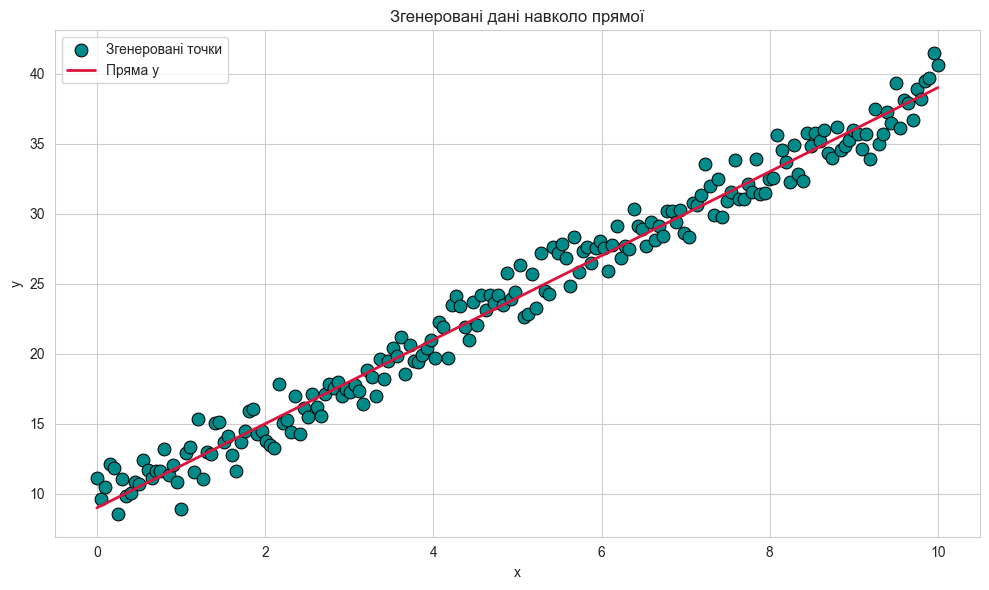

In [ ]:
# y = kx + b

k = 3
b = 9
n = 200

# x та шум
x = np.linspace(0, 10, n)
noise = np.random.normal(0, 1.2, n)

# y
y = k * x + b + noise
y_base = k * x + b

# Візуалізація
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=85, color='darkcyan', edgecolor='black', label='Згенеровані точки')
sns.lineplot(x=x, y=y_base, color='crimson', linewidth=2, label='Пряма y')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Згенеровані дані навколо прямої")
plt.legend()
plt.tight_layout()
plt.show()

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [46]:
def solve_by_lstsq(x, y):
    matrix = np.vstack([x, np.ones_like(x)]).T
    k_ls, b_ls = np.linalg.lstsq(matrix, y, rcond=None)[0]
    return k_ls, b_ls

def solve_by_formula(x, y):
    xm, ym = np.mean(x), np.mean(y)
    k_f = np.sum((x - xm) * (y - ym)) / np.sum((x - xm) ** 2)
    b_f = ym - k_f * xm
    return k_f, b_f

# Порівняння з polyfit
k_ls, b_ls = solve_by_lstsq(x, y)
k_np, b_np = np.polyfit(x, y, 1)

print(f"Початкові:                   k = {k}, b = {b}")
print(f"Метод МНК (лін. алгебра):    k = {k_ls:.4f}, b = {b_ls:.4f}")
print(f"Функція polyfit:             k = {k_np:.4f}, b = {b_np:.4f}")

Початкові:                   k = 3, b = 9
Метод МНК (лін. алгебра):    k = 2.9776, b = 9.1972
Функція polyfit:             k = 2.9776, b = 9.1972


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

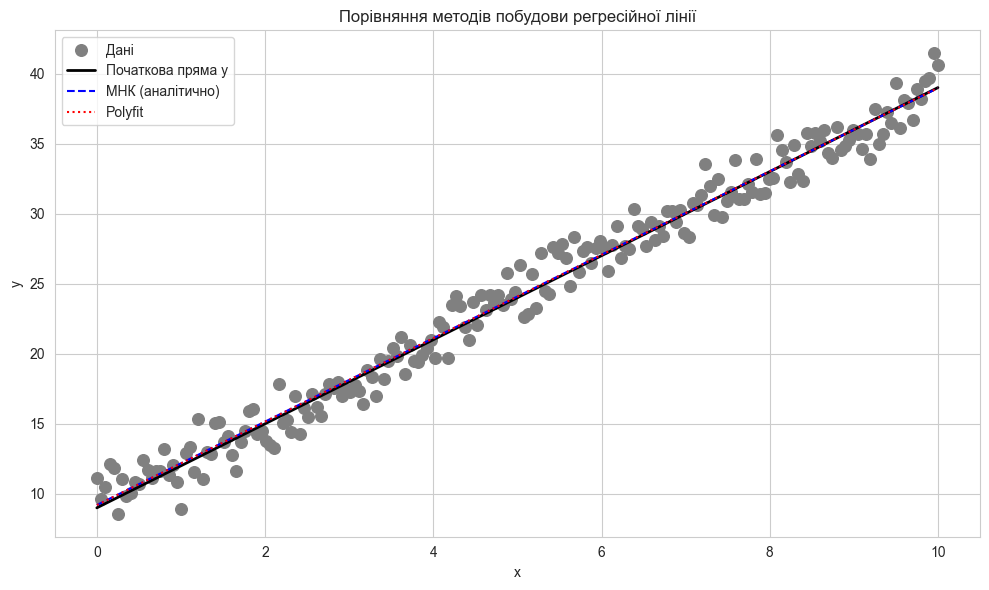

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=70, color='gray', label='Дані')
plt.plot(x, y_base, label='Початкова пряма y', color='black', linewidth=2)
plt.plot(x, k_ls * x + b_ls, label='МНК (аналітично)', color='blue', linestyle='--')
plt.plot(x, k_np * x + b_np, label='Polyfit', color='red', linestyle=':')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння методів побудови регресійної лінії")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок kk та bb. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [48]:
def my_gradient_descent(x, y, alpha=0.01, max_iter=1000, tolerance=1e-4):
    a, c = 0, 0
    m = len(x)
    history = []

    for step in range(max_iter):
        y_pred = a * x + c
        err = y_pred - y
        mse = np.mean(err ** 2)
        history.append(mse)

        grad_a = (2 / m) * np.sum(err * x)
        grad_c = (2 / m) * np.sum(err)

        a -= alpha * grad_a
        c -= alpha * grad_c

  # if step > 0 and abs(history[-1] - history[-2]) < tolerance:
           # print(f"Зупинка на {step}-ій ітерації: похибка стабілізувалась.")
           # break

    return a, c, history

# Запуск
learning_rate = 0.01
iterations = 1000
k_gd, b_gd, loss_list = my_gradient_descent(x, y, alpha=learning_rate, max_iter=iterations)
print(f"Градієнтний спуск: k = {k_gd:.4f}, b = {b_gd:.4f}")

Градієнтний спуск: k = 2.9868, b = 9.1359


2. Додайте отриману лінію регресії на загальний графік

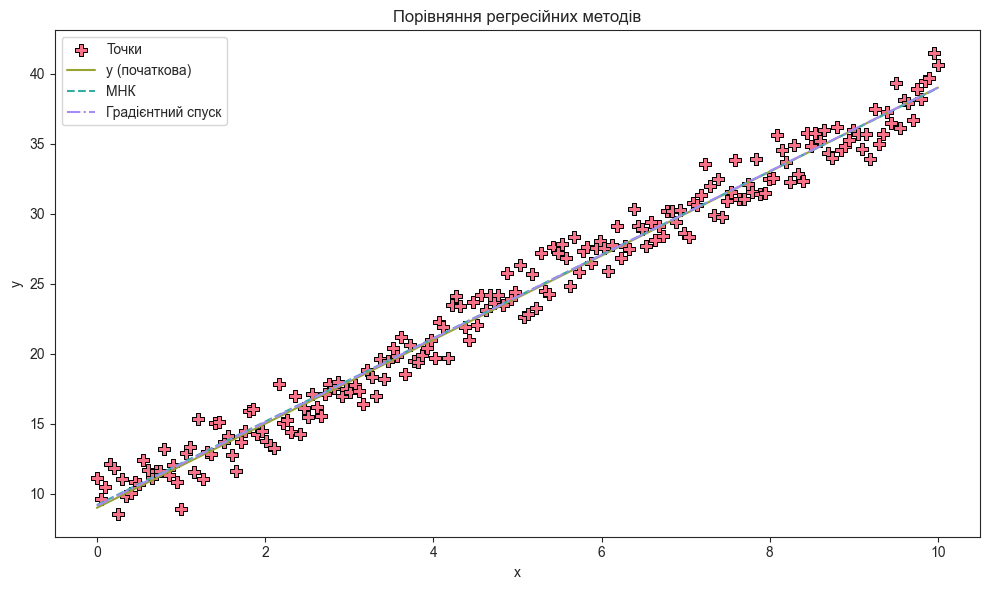

In [49]:
sns.set_style("ticks")
palette = sns.color_palette("husl", 4)
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, s=80, marker='P', color=palette[0], edgecolor='black', label='Точки')
sns.lineplot(x=x, y=y_base, label='y (початкова)', color=palette[1])
sns.lineplot(x=x, y=k_ls * x + b_ls, label='МНК', color=palette[2], linestyle='--')
sns.lineplot(x=x, y=k_gd * x + b_gd, label='Градієнтний спуск', color=palette[3], linestyle='-.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння регресійних методів")
plt.legend()
plt.tight_layout()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

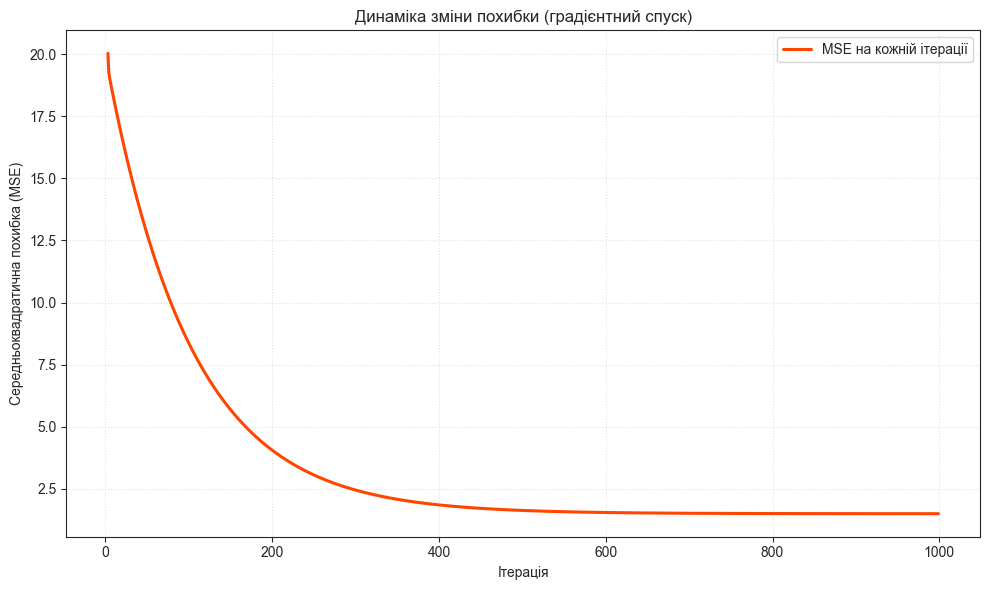

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(3, len(loss_list)), y=loss_list[3:], color='orangered', linewidth=2.2, label='MSE на кожній ітерації')
plt.xlabel('Ітерація')
plt.ylabel('Середньоквадратична похибка (MSE)')
plt.title('Динаміка зміни похибки (градієнтний спуск)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


4. Порівняйте отримані результати з результатами попереднього завдання

In [51]:
print("   Порівняння оцінених коефіцієнтів:")

print(f"  Початкове рівняння:         k = {k},     b = {b}")
print(f"  МНК (аналітична формула):   k = {k_ls:.4f}, b = {b_ls:.4f}")
print(f"  Polyfit (бібліотека NumPy): k = {k_np:.4f}, b = {b_np:.4f}")
print(f"  Gradient Descent:           k = {k_gd:.4f}, b = {b_gd:.4f}")


   Порівняння оцінених коефіцієнтів:
  Початкове рівняння:         k = 3,     b = 9
  МНК (аналітична формула):   k = 2.9776, b = 9.1972
  Polyfit (бібліотека NumPy): k = 2.9776, b = 9.1972
  Gradient Descent:           k = 2.9868, b = 9.1359
